In [504]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import numpy as np
from pathlib import Path  # python3 only
import math,datetime
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
state = 'Texas'
keyword = 'transgender'
year = str(2021)
currentYear = datetime.datetime.now().year


In [505]:
keyWords = ['China','mexican','hispanic','black people','immigrant','muslim','transgender','asian','chinese','gay']
# keyWords = ['hispanic']
# keyWords = ['black people','China']
# # keyWords = ['immigrant','transgender','muslim']

In [506]:
averageSentKeyword = {}
mentionsKeyword = {}
# MENTIONSKEYWORD is the frequency of mentions year by year of the given term
startYear = 2010
# Start year is the year you want to begin construction of the graph
yearList = []
county = 'DALLAS'
for year in range(startYear,currentYear+1):
    year = str(year)
    yearList.append(int(year))
for keyword in keyWords:
    
    averageSentimentOverTime = []
    json_folder = 'Keyword State'
    file_dir = Path.cwd()
    file_path = os.path.join(file_dir, json_folder, (((state) + " on the term " + keyword +'.json')))
    shape_dir = os.path.join(file_dir, 'Shapes', 'United States','USA_Counties.shx')
    # Okay turn the dictionary into a dataframe where one column is filled with keys, and the other column is the first value in the dictionary
    f = open(file_path, 'r')
    state_dict = json.load(f)
    stateDF = pd.DataFrame.from_dict(state_dict, orient='index')
    stateDF.reset_index(inplace=True)
    # stateDF = stateDF[[0,1,2]]
    stateDF.rename(columns={'index': 'County', 0 :'# of Tweets',1:'score',2:'Time'}, inplace=True)
    timeDF = pd.json_normalize(stateDF['Time'])
    stateDF.drop('Time',axis = 1,inplace= True)
    maxCount = timeDF[list(timeDF.filter(regex=('count')))].max().max()
    for year in range(startYear,currentYear+1):
        year = str(year)
        totalTweets=0
        if(len(list(timeDF.filter(regex=year)))>0):
            
            slicetimeDF = timeDF[list(timeDF.filter(regex=('County|' + year+'.comp|' + year+'.count')))]
            # county=timeDF[list(timeDF.filter(regex=('County|' + year+'.count')))]
            # print(county)
            stateDF = pd.concat([stateDF['County'], slicetimeDF], axis=1)
            stateDF.rename(columns= {stateDF.columns[1]:'# of Tweets',stateDF.columns[2]:'score'}, inplace=True)
            json_folder = 'Keyword State'
            file_dir = Path.cwd()
            file_path = os.path.join(file_dir, json_folder, (((state) + " on the term " + keyword +'.json')))

            # Okay turn the dictionary into a dataframe where one column is filled with keys, and the other column is the first value in the dictionary
            f = open(file_path, 'r')
            score = []
            j=0

            #-------------------------------------
            #-------------------------------------
            # AVERAGE SENT. AND TOTAL POP.
            # get the sum of all values in a column
            
            # Get the row with the term of the county in it
            countyDF = (stateDF.loc[stateDF['County'] == county])
            


            # By replacing the totalTweets, we should get the county info at that time
            if county == '':
                totalTweets = stateDF.iloc[:, 1].sum()
                averageSentiment = 0
                k=0
                for score in stateDF['score']:
                    if(math.isnan(score)==False):
                        # multiply all values in the score column by the corresponding value in the population column
                        averageSentiment += score * stateDF.iat[k,1]
                    k+=1
                averageSentiment=averageSentiment/totalTweets
                
                averageSentimentOverTime.append([averageSentiment,int(year)])
            # by replacing averageSentiment with the county info at that time, we can switch this easy


            # Average sentiment overtime is a single index for a specific keyword, which then gets dumped into averageSentKeyword
            else:
                index = countyDF.index.values.tolist()[0]
                totalTweets = sentiment = countyDF.at[index,'# of Tweets']
                print(totalTweets)
                sentiment = countyDF.at[index,'score']
                
                averageSentimentOverTime.append([sentiment,int(year)])
        
        # totalTweets = stateDF.iloc[:, 1].sum()
        if keyword in mentionsKeyword:
            mentionsKeyword[keyword].append([totalTweets,int(year)])
        else:
            mentionsKeyword[keyword] = [[totalTweets,int(year)]]
    
    a, b = zip(*averageSentimentOverTime)
    averageSentKeyword[keyword] = a
    # plt.plot(b,a,label = keyword)

# np.vstack(averageSentimentOverTime,yearList)



SentimentYear = {}
topKeys = averageSentKeyword.keys()
for i in range(len(averageSentKeyword.values())):
    # averageSentKeyword.values()[i]
    sentiment = list(list(averageSentKeyword.values())[i])
    for j in range(len(yearList)):
        if yearList[j] in SentimentYear:
            
            SentimentYear[yearList[j]].append(list(sentiment)[j])
        else:
            SentimentYear[yearList[j]] = [list(sentiment)[j]]
            # Sentiment year is the sorted matrix which is passed through the normalizing function
            # The columns are a measure of the given year
            # The rows are the different keywords
topKeys = list(topKeys)
# normalizedSentiment =  scaler.fit_transform(list(SentimentYear.values()))
NormalizedData =pd.DataFrame(SentimentYear.values(),index=SentimentYear.keys(),columns=topKeys)
# NormalizedData.rename(topKeys,inplace=True)
remappedData = []
for i in range(len(NormalizedData.columns)):
    testData = NormalizedData[[topKeys[i]]].values.tolist()
    a = testData
    a=list(a)
    # a= np.column_stack((a,yearList)).tolist()
    # Merge the list "a" and the liat 'yearList' as if they were two columns in a matrix
    # "a" is a list of n-arrays (each array is a data row), "yearList" is a list of integers

    remappedData.append(list(a))


89.0
240.0
542.0
647.0
831.0
755.0
581.0
638.0
676.0
1745.0
3681.0
2028.0
793.0
3380.0
5895.0
6929.0
7287.0
4709.0
4721.0
3235.0
3224.0
2969.0
2312.0
1961.0
42.0
155.0
377.0
770.0
985.0
903.0
956.0
766.0
939.0
861.0
782.0
710.0
32.0
224.0
488.0
895.0
1538.0
1519.0
1414.0
1431.0
1006.0
1251.0
2546.0
1728.0
49.0
46.0
86.0
171.0
461.0
255.0
377.0
868.0
1030.0
1141.0
418.0
657.0
30.0
88.0
153.0
200.0
338.0
827.0
721.0
825.0
399.0
628.0
311.0
357.0
13.0
17.0
14.0
22.0
54.0
131.0
191.0
425.0
531.0
731.0
251.0
205.0
352.0
1736.0
2271.0
2535.0
2495.0
1458.0
1389.0
1136.0
906.0
937.0
1099.0
1307.0
126.0
674.0
1274.0
1409.0
1481.0
1312.0
1076.0
654.0
721.0
897.0
1344.0
935.0
498.0
2962.0
7345.0
11430.0
14706.0
10540.0
6824.0
4541.0
5398.0
5398.0
4500.0
3815.0


In [507]:
from scipy.stats.stats import pearsonr
k=0
# The phrases muslim,transgender,and immigrant are STRONGLY correlated, with the max distance between muslim and immigrant,minimum distance between immigrant and transgender
def correlationWords(words):
    word1,word2=words[0],words[1]
    # find the index of word1 in keyWords


    y_1,=zip(*(remappedData[keyWords.index(word1)]))
    
    y_2, = zip(*(remappedData[keyWords.index(word2)]))
    # word1='transgender'
    # word2='immigrant'
    x_2,y = zip(*mentionsKeyword[word1])
    x_1,y = zip(*mentionsKeyword[word2])

    # x_1,=zip(*(remappedData[k]))
    # print(len(list(x_1)))
    # print(len(list(x_2)))
    sentiment=list((pearsonr(x_1,x_2)))
    mentions = list((pearsonr(y_1,y_2)))
    return sentiment,mentions

In [508]:
import itertools
import scipy.stats
keywordPairCombinations = list(itertools.combinations(keyWords, 2))
for pair in keywordPairCombinations:
    sentiment,mentions=correlationWords(pair)
    r_s=round(sentiment[1],5)
    c_s=round(sentiment[0],5)
    r_m = round(mentions[1],5)
    c_m = round(mentions[0],5)
    if r_s<0.05 and r_m<.05:
        r=scipy.stats.combine_pvalues([r_s,r_m], method='fisher', weights=None)
        r=round(r[1],5)
        c=round((c_s+c_m)/2,5)
        print('||'+str(pair[0]) + ' and ' + pair[1] + '||\'s p-val: ' + str(r) + ', correlation: ' + str(c))



||China and black people||'s p-val: 5e-05, correlation: 0.79472
||mexican and asian||'s p-val: 2e-05, correlation: 0.75647


||China|| sentiment vs mentions p-val:0.00027 correlation:-0.86584
||Mexican|| sentiment vs mentions p-val:0.01242 correlation:-0.69327
||Black people|| sentiment vs mentions p-val:0.0039 correlation:-0.76294
||Muslim|| sentiment vs mentions p-val:0.01729 correlation:-0.6693
||Gay|| sentiment vs mentions p-val:0.02391 correlation:-0.64369
50% of keywords tested agree with the hypothesis


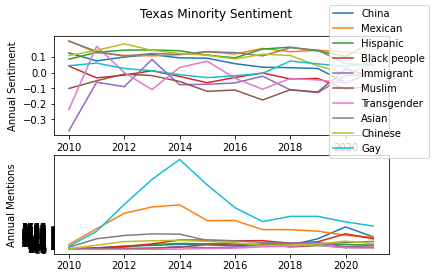

<Figure size 1080x2160 with 0 Axes>

In [509]:
fig, (ax1,ax2) = plt.subplots(2)
fig.suptitle('Texas Minority Sentiment')
ax1.set_ylabel('Annual Sentiment')
ax2.set_ylabel('Annual Mentions')
ax1.set_yticks(np.arange(-.3, .1+.1, .1))
ax2.set_yticks(np.arange(0, totalTweets, totalTweets/10))
for i in range(len(topKeys)):topKeys[i] = topKeys[i].capitalize()
correlationCount = 0
for i in range(len(remappedData)):
    x_2,y = zip(*mentionsKeyword[keyWords[i]])
    x_1,=zip(*(remappedData[i]))
    ax1.plot(yearList,x_1,label = topKeys[i])
    ax2.plot(y,x_2)
    if (pearsonr(x_1,x_2)[1]<.05):
        correlationCount+=1
        print('||' + topKeys[i] + '|| sentiment vs mentions p-val:' + str(round(pearsonr(x_1,x_2)[1],5)) + ' correlation:'+ str(round(pearsonr(x_1,x_2)[0],5)))

plt.figure(figsize=(15,30))
fig.legend()

fig.savefig('Texas Cumulitive Minority Analysis.png',dpi = 100,facecolor='w', edgecolor='w',orientation='landscape',transparent=False, bbox_inches='tight', pad_inches=0.1)
# make some sort of normalizing function for the popularity of the keywords
print(str(int(round(correlationCount/len(keyWords),2)*100)) + '% of keywords tested agree with the hypothesis')